In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
from sklearn.datasets import load_linnerud

linnerud = load_linnerud()
print(linnerud.DESCR)

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

.. topic:: References

  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
    Editions Technic.



In [8]:
data = pd.concat([pd.DataFrame(linnerud.data, columns=linnerud.feature_names),
                pd.DataFrame(linnerud.target, columns=linnerud.target_names)],
               axis=1)
data.tail()

,Chins,Situps,Jumps,Weight,Waist,Pulse
15,12.0,210.0,120.0,202.0,37.0,62.0
16,4.0,60.0,25.0,176.0,37.0,54.0
17,11.0,230.0,80.0,157.0,32.0,52.0
18,15.0,225.0,73.0,156.0,33.0,54.0
19,2.0,110.0,43.0,138.0,33.0,68.0


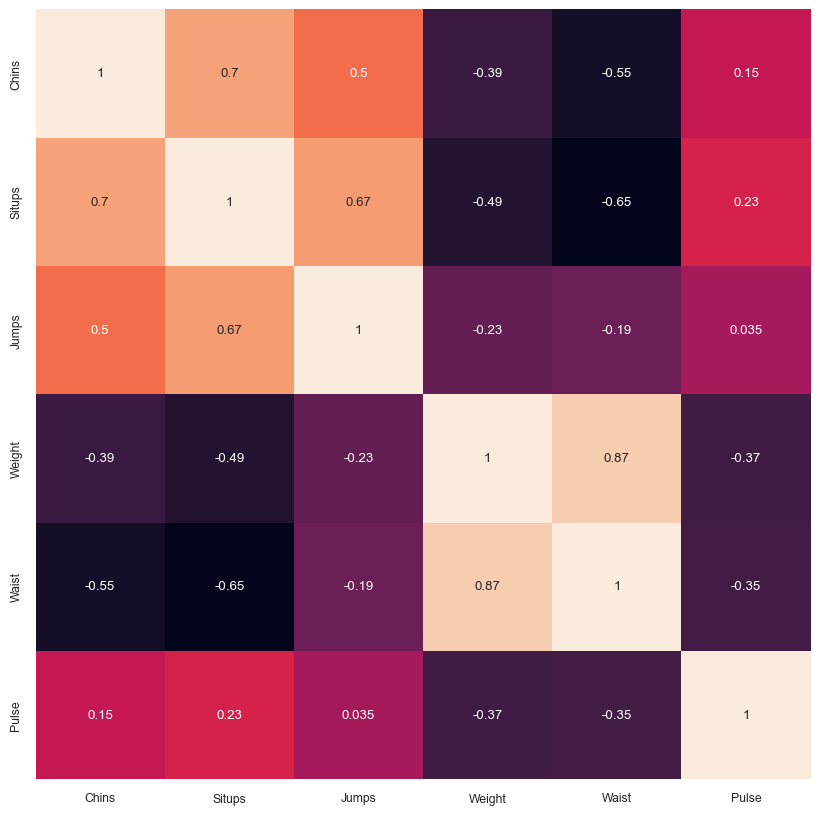

In [9]:
#상관 관계 행렬
df_corr=data.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [13]:
x_data=data.loc[:, ['Situps', 'Chins','Jumps']]
y_data=data.loc[:, 'Pulse']
from sklearn.preprocessing import LabelEncoder
## from keras.utils import to_categorical

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y_data)
## y_one_hot = to_categorical(y_encoded, num_classes=2)
Y = pd.get_dummies(y_encoded).values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, Y, test_size=0.2, random_state=0)

In [29]:
import numpy as np

mean = np.mean(X_train, axis = 0)

std = np.std(X_train, axis = 0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [30]:
print(np.any(np.isnan(X_train)))
print(np.any(np.isnan(X_test)))
print(np.any(np.isinf(X_train)))
print(np.any(np.isinf(X_test)))

False
False
False
False


In [31]:
X_train = pd.DataFrame(X_train).fillna(0).values
X_test = pd.DataFrame(X_test).fillna(0).values

In [32]:
print(np.any(np.isnan(X_train)))
print(np.any(np.isnan(X_test)))
print(np.any(np.isinf(X_train)))
print(np.any(np.isinf(X_test)))

False
False
False
False


In [37]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = (3,)))
model.add(Dropout(0.5))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'softmax')) 

model.compile(optimizer = 'rmsprop', loss='mse', metrics = ['mse'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 32)                128       
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_31 (Dense)            (None, 16)                528       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_32 (Dense)            (None, 1)                 17        
                                                                 
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________


In [38]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
1/1 [==============================] - 1s 667ms/step - loss: 0.9091 - mse: 0.9091 - val_loss: 0.9091 - val_mse: 0.9091
Epoch 2/100
1/1 [==============================] - 0s 26ms/step - loss: 0.9091 - mse: 0.9091 - val_loss: 0.9091 - val_mse: 0.9091
Epoch 3/100
1/1 [==============================] - 0s 25ms/step - loss: 0.9091 - mse: 0.9091 - val_loss: 0.9091 - val_mse: 0.9091
Epoch 4/100
1/1 [==============================] - 0s 27ms/step - loss: 0.9091 - mse: 0.9091 - val_loss: 0.9091 - val_mse: 0.9091
Epoch 5/100
1/1 [==============================] - 0s 26ms/step - loss: 0.9091 - mse: 0.9091 - val_loss: 0.9091 - val_mse: 0.9091
Epoch 6/100
1/1 [==============================] - 0s 26ms/step - loss: 0.9091 - mse: 0.9091 - val_loss: 0.9091 - val_mse: 0.9091
Epoch 7/100
1/1 [==============================] - 0s 26ms/step - loss: 0.9091 - mse: 0.9091 - val_loss: 0.9091 - val_mse: 0.9091
Epoch 8/100
1/1 [==============================] - 0s 27ms/step - loss: 0.9091 - mse: 0.9

1/1 [==============================] - 0s 45ms/step - loss: 0.9091 - mse: 0.9091 - val_loss: 0.9091 - val_mse: 0.9091
Epoch 64/100
1/1 [==============================] - 0s 26ms/step - loss: 0.9091 - mse: 0.9091 - val_loss: 0.9091 - val_mse: 0.9091
Epoch 65/100
1/1 [==============================] - 0s 27ms/step - loss: 0.9091 - mse: 0.9091 - val_loss: 0.9091 - val_mse: 0.9091
Epoch 66/100
1/1 [==============================] - 0s 29ms/step - loss: 0.9091 - mse: 0.9091 - val_loss: 0.9091 - val_mse: 0.9091
Epoch 67/100
1/1 [==============================] - 0s 31ms/step - loss: 0.9091 - mse: 0.9091 - val_loss: 0.9091 - val_mse: 0.9091
Epoch 68/100
1/1 [==============================] - 0s 28ms/step - loss: 0.9091 - mse: 0.9091 - val_loss: 0.9091 - val_mse: 0.9091
Epoch 69/100
1/1 [==============================] - 0s 26ms/step - loss: 0.9091 - mse: 0.9091 - val_loss: 0.9091 - val_mse: 0.9091
Epoch 70/100
1/1 [==============================] - 0s 32ms/step - loss: 0.9091 - mse: 0.9091 - 